<a href="https://colab.research.google.com/github/swamy-4422-v/-Football-Game/blob/main/SRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import os

output_dir = "/content/drive/MyDrive/SRGAN_Output"
os.makedirs(output_dir, exist_ok=True)

print("Folder ready:", output_dir)


Folder ready: /content/drive/MyDrive/SRGAN_Output


Saving download.jpg to download.jpg
Uploaded image: download.jpg


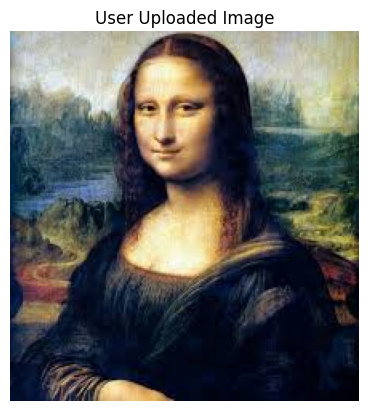

In [3]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Uploaded image:", image_path)
from PIL import Image

img = Image.open(image_path).convert("RGB")
img.show()

import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title("User Uploaded Image")
plt.show()


In [4]:
from PIL import Image, ImageFilter
import torchvision.transforms as transforms
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image_path = list(uploaded.keys())[0]
img = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

real_image = transform(img).unsqueeze(0).to(device)


In [5]:
import torch.nn.functional as F

low_res = F.interpolate(real_image, scale_factor=0.5)


In [6]:
import torch.nn.functional as F

low_res = F.interpolate(real_image, scale_factor=0.5)


In [7]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False),
            nn.Conv2d(64, 3, 3, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator().to(device)


In [8]:
torch.save(G.state_dict(), "/content/drive/MyDrive/srgan_generator.pth")


In [9]:
G = Generator().to(device)
G.load_state_dict(
    torch.load("/content/drive/MyDrive/srgan_generator.pth", map_location=device)
)
G.eval()


Generator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Upsample(scale_factor=4.0, mode='bilinear')
    (3): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Tanh()
  )
)

In [10]:
with torch.no_grad():
    super_res = G(low_res)


In [11]:
def denormalize(img):
    return (img + 1) / 2


In [12]:
import os
from torchvision.utils import save_image

output_dir = "/content/drive/MyDrive/SRGAN_Output"
os.makedirs(output_dir, exist_ok=True)

save_image(
    denormalize(super_res.squeeze(0)),
    f"{output_dir}/super_resolution_output.png"
)

print("Super-resolution image saved to Google Drive")


Super-resolution image saved to Google Drive


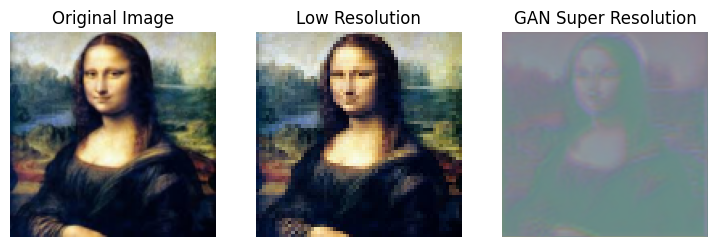

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(denormalize(real_image[0]).permute(1,2,0).cpu())
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(denormalize(low_res[0]).permute(1,2,0).cpu())
plt.title("Low Resolution")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denormalize(super_res[0]).permute(1,2,0).cpu())
plt.title("GAN Super Resolution")
plt.axis("off")

plt.show()


# **SRGAN – Super-Resolution Using GAN**

**Project Overview :**

SRGAN (Super-Resolution Generative Adversarial Network) is a *deep learning* project that converts low-resolution images into high-resolution images. This project demonstrates how GANs can generate realistic, detailed images from low-resolution inputs by learning textures, edges, and fine details.

**In this Colab implementation :**

*   The user uploads an image (JPG / PNG).
*   The image is preprocessed and downsampled to simulate a low-resolution image.
* A Generator network (part of SRGAN) upsamples the image to a high-resolution output.
* Outputs are displayed side by side: Original → Low-Res → High-Res.
* High-resolution outputs are saved to Google Drive for later use.

**Key Features :**
1. User Upload: Supports user-provided images of any size.
2. Low-Resolution Simulation: Creates a downsampled version of the uploaded image.
3. GAN-Based Super Resolution: Uses a Generator network to create high-resolution images.
4. Output Visualization: Shows original, low-res, and super-resolution images side by side.
5. Drive Integration: Automatically saves high-resolution outputs to Google Drive.

**Project Structure :**

* Generator – The neural network that upsamples images.
* low_res – Simulated low-resolution version of the input image.
* super_res – Generated high-resolution image.
* SRGAN_Output/ – Folder in Google Drive where outputs are saved.

**Step-by-Step Workflow :**

1. Mount Google Drive
2. Prepare Output Folder
3. Upload User Image
4. Load and Show Original Image
5. Preprocess and Downsample to Low-Resolution
6. Define Generator Network
7. Save High-Resolution Image
8. Display All Images Side by Side

**How It Works :**
*  **Low-Resolution Input:** The uploaded image is downsampled to simulate low-res.
* **Generator Network:** The generator upsamples the low-res image using convolutional layers and bilinear upsampling.
* **Output:** The network predicts high-resolution details, reconstructing edges and textures.
* **Saving Results:** The generated image is saved to Google Drive for later use.

**Applications :**

--> **Satellite & Aerial Imaging:** Enhance remote sensing images for better analysis.

--> **Medical Imaging:** Improve MRI or CT scan resolution.

--> **Security:** Enhance facial details from CCTV footage.

--> **Video & Photography:** Upscale old or compressed images/videos.

--> **AR/VR & Gaming:** Improve textures in virtual environments.

**Requirements :**

*Google Colab with GPU enabled (for faster computation)

*Python 3.x

***Libraries:** torch, torchvision, PIL, matplotlib